#### From Author:

##### Folder structure
There are 15 different kind of fruits consisting of 44406 images. For 15 different categories
there are 15 folders in our dataset and their sub-categories of fruits were kept in sub-folders like
for apple there is one folder and inside the main folder there are six sub-folders for subcategories.
Sub-categories of all fruits are exit in their relevant sub-folders

##### Data collection
The database used in this study is comprising of 44406 fruit images, which we collected
in a period of 6 months. The images where made with in our lab’s environment under different
scenarios which we mention below. We captured all the images on a clear background with
resolution of 320×258 pixels. We used HD Logitech web camera to took the pictures. During
collecting this database, we created all kind of challenges, which, we have to face in real-world
recognition scenarios in supermarket and fruit shops such as light, shadow, sunshine, pose
variation, to make our model robust for, it might be necessary to cope with illumination
variation, camera capturing artifacts, specular reflection shading and shadows. We tested our
model’s robustness in all scenarios and it perform quit well.
All of images were stored in RGB color-space at 8 bits per channel. The images were
gathered at various day times of the day and in different days for the same category. These
features increase the dataset variability and represent more realistic scenario. The Images had
large variation in quality and lighting. Illumination is one of those variations in imagery. In fact,
illumination can make two images of same fruit less similar than two images of different kind
of fruits. We were used our own intelligent weight machine and camera to captured all images.
The fruit dataset was collected under relatively unconstrained conditions. There are also images
with the room light on and room lights off, moved the camera and intelligent weight machine
near to the windows of our lab than open windows, closed windows, open window curtains,
closed curtains. For a real application in a supermarket, it might be necessary to cope with
illumination variation, camera capturing artifacts, specular reflection shading and shadows.
Below are the few conditions which we were considered during collected dataset.

##### Pose Variations with different categories of fruits
- Variability on the number of elements of fruits
- Used HD camera with 5-megapixel snapshots
- Same color but different Category fruits images with illumination variation
- Cropping and partial occlusion
- Different color same category fruit images
- Different lighting conditions (e.g. fluorescent, natural light some of the fruits shops
- and supermarkets are without sunshine so it can easily affect the recognition system
- Six different kind of apple fruit images
- Three categories of mango fruit with specular reflecting shading and shadows
- Three categories of Kiwi fruit images
- Natural and artificial lighting effect on images
- Partial occlusion with hand

Israr Hussain,, Qianhua He, Zhuliang Chen, & Wei Xie. (2018). Fruit Recognition dataset (Version V 1.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1310165

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import random

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [4]:
# dataset_dir = "../Image-Classification/orig_dataset/"
dataset_dir = "/content/drive/MyDrive/colab/orig_dataset"
os.path.exists(dataset_dir)

True

In [5]:
fruit_folders = [folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]
fruit_folders

['Banana',
 'StarFruit',
 'Mango',
 'Orange',
 'Peach',
 'Persimmon',
 'DragonFruit',
 'Plum',
 'Pomegranate',
 'Tomatoes',
 'Muskmelon',
 'Guava',
 'Kiwi',
 'Pear',
 'Apple']

#### Check files in each subfolder:

In [6]:
# File extensions:

set([
    file.split('.')[-1] for folder in fruit_folders
    for file in os.listdir(os.path.join(dataset_dir, folder))
])

{'jpeg', 'jpg', 'png'}

In [7]:
# No. of images per fruit/class:

fruit_list = dict(
    zip([
        folder for folder in fruit_folders
    ], [
        len([
            img for img in os.listdir(os.path.join(dataset_dir, folder))
            if os.path.splitext(dataset_dir + folder +
                                img)[-1] in ['.jpeg', '.jpg', '.png']
        ]) for folder in fruit_folders
    ]))

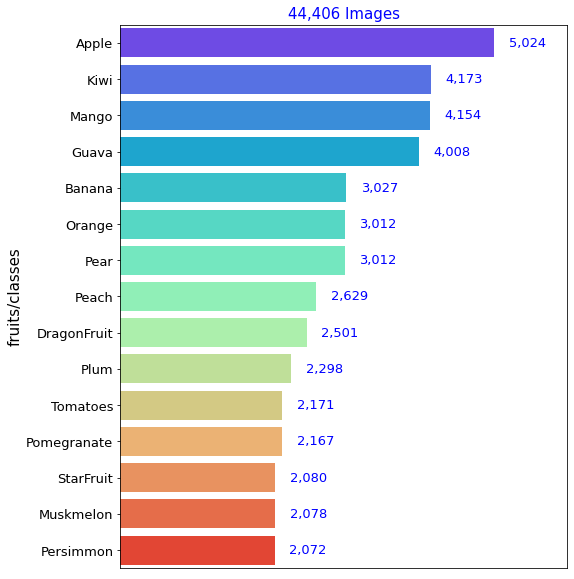

In [8]:
x = list(
    dict(sorted(fruit_list.items(), key=lambda x: x[1], reverse=True)).keys())
y = list(
    dict(sorted(fruit_list.items(), key=lambda x: x[1],
                reverse=True)).values())
plt.figure(figsize=(8, 10))
sns.barplot(x=y, y=x, palette='rainbow')
plt.ylabel('fruits/classes', fontsize=15)
plt.title('{} Images'.format(f'{sum(y):,}'), fontsize=15, color='blue')
plt.xticks(ticks=[])
plt.xlim(right=6000)
plt.yticks(fontsize=13)
for x_, y_ in enumerate(y):
    plt.text(x=y_ + 200,
             y=x_,
             s=f'{y_:,}',
             fontsize=13,
             color='blue',
             horizontalalignment='left',
             verticalalignment='center')
plt.show()

#### Create new folder for the dataset with train and test subfolders:

In [10]:
# new_dataset_dir = "../Image-Classification/dataset/"
new_dataset_dir = "/content/drive/MyDrive/colab/dataset/"

if os.path.exists(new_dataset_dir):
    shutil.rmtree(new_dataset_dir)

if not os.path.exists(new_dataset_dir):
    os.mkdir(new_dataset_dir)

for folder in ['train', 'test']:
    new_dir = os.path.join(new_dataset_dir, folder)
    os.mkdir(new_dir)

os.listdir(new_dataset_dir)

['train', 'test']

#### Copy images under each fruit folder to the new dataset folder:

In [13]:
# 75% to train, 25% to test
sample_size = 500

for key, val in fruit_list.items():
    old_dir = os.path.join(dataset_dir, key)
    img_files = [
        img for img in os.listdir(old_dir)
        if any(img.lower().endswith(i) for i in ['.jpeg', '.jpg', '.png'])
    ]
    train_dir = os.path.join(new_dataset_dir, "train", key)
    os.mkdir(train_dir)
    test_dir = os.path.join(new_dataset_dir, "test", key)
    os.mkdir(test_dir)

    random.shuffle(img_files)
    random.shuffle(img_files)
    random.shuffle(img_files)
    j, k = 0, 0
    
    for i in range(sample_size):
        if i < sample_size * 0.75:
            shutil.copy(os.path.join(old_dir, img_files[i]),
                        os.path.join(train_dir, img_files[i]))
            j += 1
        else:
            shutil.copy(os.path.join(old_dir, img_files[i]),
                        os.path.join(test_dir, img_files[i]))
            k += 1
        
    print('{}: {} images to train folder, {} images to test folder'.format(
        key.title(), f'{j:,}', f'{k:,}'))


Banana: 375 images to train folder, 125 images to test folder
Starfruit: 375 images to train folder, 125 images to test folder
Mango: 375 images to train folder, 125 images to test folder
Orange: 375 images to train folder, 125 images to test folder
Peach: 375 images to train folder, 125 images to test folder
Persimmon: 375 images to train folder, 125 images to test folder
Dragonfruit: 375 images to train folder, 125 images to test folder
Plum: 375 images to train folder, 125 images to test folder
Pomegranate: 375 images to train folder, 125 images to test folder
Tomatoes: 375 images to train folder, 125 images to test folder
Muskmelon: 375 images to train folder, 125 images to test folder
Guava: 375 images to train folder, 125 images to test folder
Kiwi: 375 images to train folder, 125 images to test folder
Pear: 375 images to train folder, 125 images to test folder
Apple: 375 images to train folder, 125 images to test folder
